Assignment 1

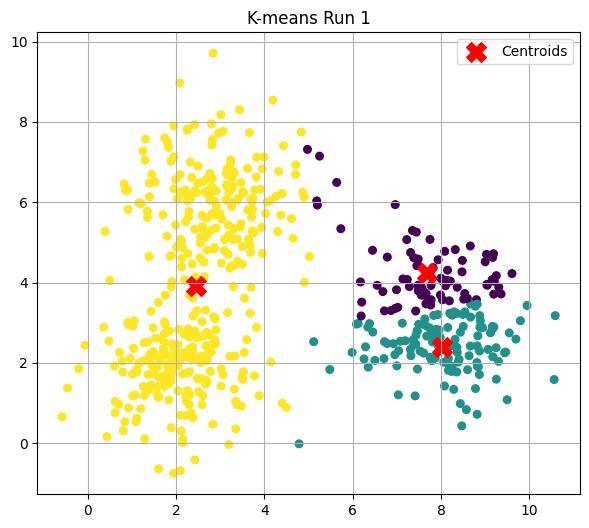

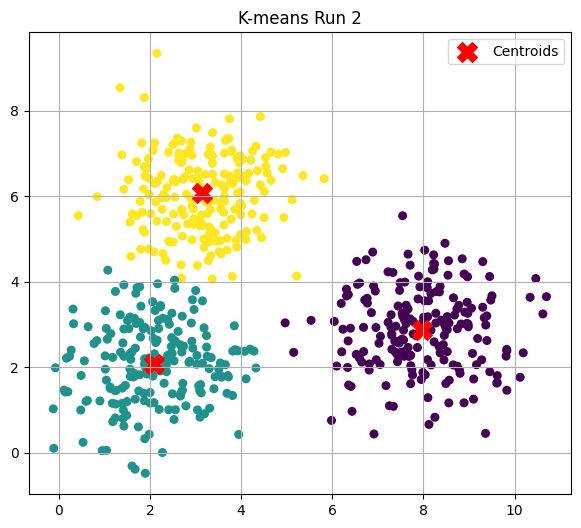

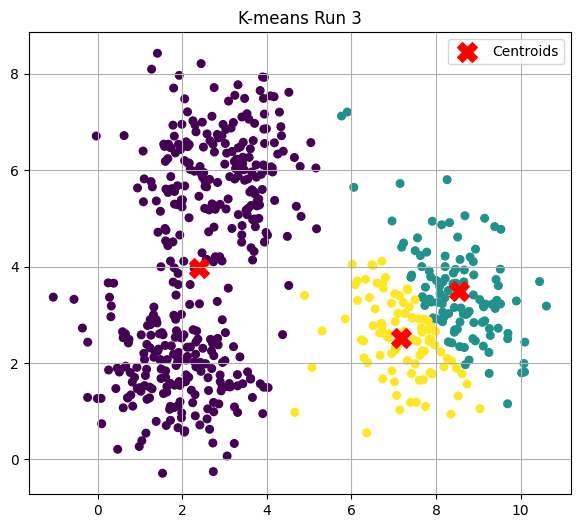

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm sinh dữ liệu
def generate_data():
    mean1 = [2, 2]
    mean2 = [8, 3]
    mean3 = [3, 6]
    cov = [[1, 0], [0, 1]]
    data1 = np.random.multivariate_normal(mean1, cov, 200)
    data2 = np.random.multivariate_normal(mean2, cov, 200)
    data3 = np.random.multivariate_normal(mean3, cov, 200)
    return np.vstack((data1, data2, data3))

# Hàm K-means
def kmeans(X, k=3, max_iters=100, tol=1e-4):
    n_samples, n_features = X.shape
    indices = np.random.choice(n_samples, k, replace=False)
    centroids = X[indices]
    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        shift = np.linalg.norm(new_centroids - centroids)
        if shift < tol:
            break
        centroids = new_centroids
    return centroids, labels

# Chạy 3 lần với 3 bộ dữ liệu khác nhau và vẽ riêng từng hình
for i in range(3):
    X = generate_data()
    centroids, labels = kmeans(X, k=3)

    plt.figure(figsize=(7, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(f'K-means Run {i+1}')
    plt.legend()
    plt.grid(True)
    plt.show()


=> Nhận xét: Qua ba lần chạy với ba bộ dữ liệu được tạo ngẫu nhiên khác nhau, việc khởi tạo centroid ngẫu nhiên ảnh hưởng lớn đến kết quả cuối cùng. Khi centroid ngẫu nhiên được tạo quá gần nhau dẫn đến kết qua phân cụm không được chính xác( ví dụ hình số 3 , hai centroid gần nhau làm chia một cụm thật sự thành hai cụm khác nhau dấn đến kết quả phân cụm của mô hình không chính xác).

Assignment 2

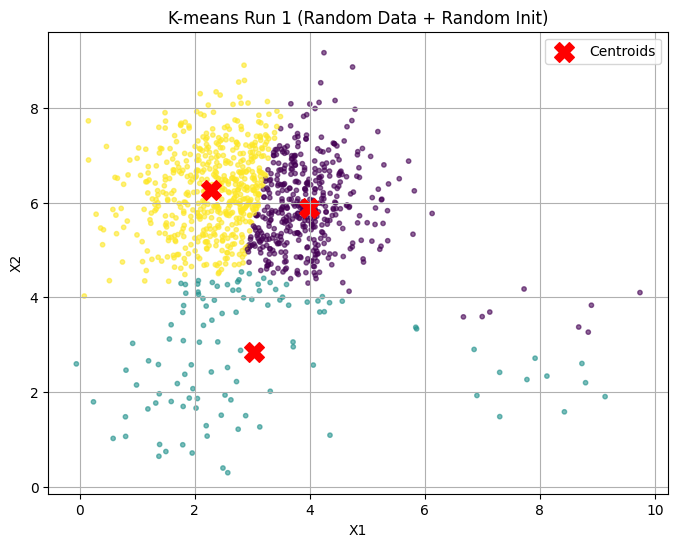

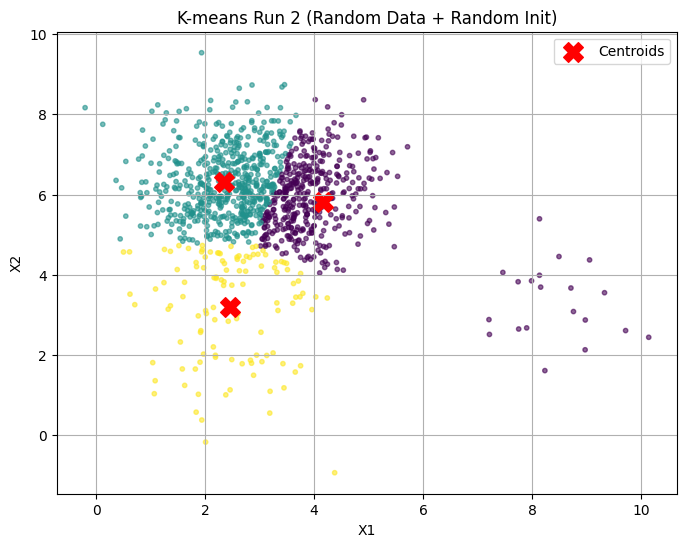

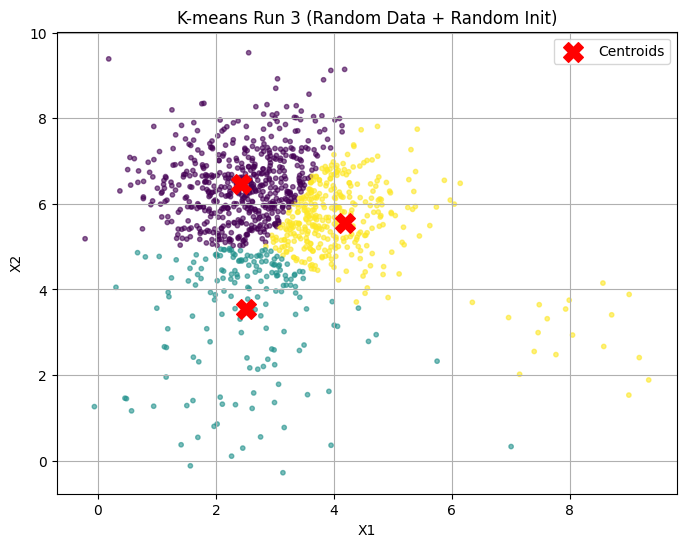

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm sinh dữ liệu ngẫu nhiên mỗi lần
def generate_data():
    cov = np.array([[1, 0], [0, 1]])
    data1 = np.random.multivariate_normal(mean=[2, 2], cov=cov, size=50)
    data2 = np.random.multivariate_normal(mean=[8, 3], cov=cov, size=20)
    data3 = np.random.multivariate_normal(mean=[3, 6], cov=cov, size=1000)
    return np.vstack((data1, data2, data3))

# K-means bằng EM
def kmeans(X, k=3, max_iters=100, tol=1e-4):
    n_samples, n_features = X.shape
    indices = np.random.choice(n_samples, k, replace=False)
    centroids = X[indices]

    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        shift = np.linalg.norm(new_centroids - centroids)
        if shift < tol:
            break
        centroids = new_centroids

    return centroids, labels

# Chạy 3 lần với dữ liệu ngẫu nhiên khác nhau mỗi lần
for i in range(3):
    X = generate_data()  # dữ liệu khác nhau mỗi lần
    centroids, labels = kmeans(X, k=3)

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10, alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(f"K-means Run {i+1} (Random Data + Random Init)")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.grid(True)
    plt.show()


=> Nhận xét: Qua việc chạy 3 lần với ba bộ dữ liệu được tạo ngẫu nhiên khác nhau, ta thấy được việc số lượng mẫu của mỗi lớp chênh lệch nhau ảnh hưởng lớn đến kết quả phân cụm. Khi một lớp nào đó có số lượng mẫu áp đảo các lớp khác , centroid sẽ có xu hướng được kéo về lớp đó và chia lớp đó thành nhiều cụm trong khi chính xác thì chỉ có một cụm. Do là k-mean hoạt động dựa trên nguyên tắc cố gắng tối thiểu khoảng cách bình phương từ các điểm đến tâm cụm , vì thế các điểm dữ liệu phân bố gần sát nhau thì quá trình cập nhật các centroid sẽ có xu hướng kéo về những vùng gần sát nhau này vì tổng sai số sẽ nhỏ hơn nhiều vùng các điểm nằm xa nhau.

Assignment 3


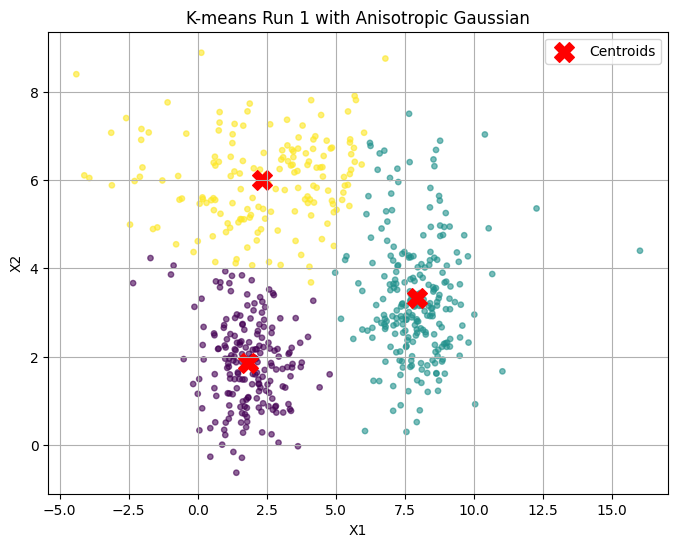

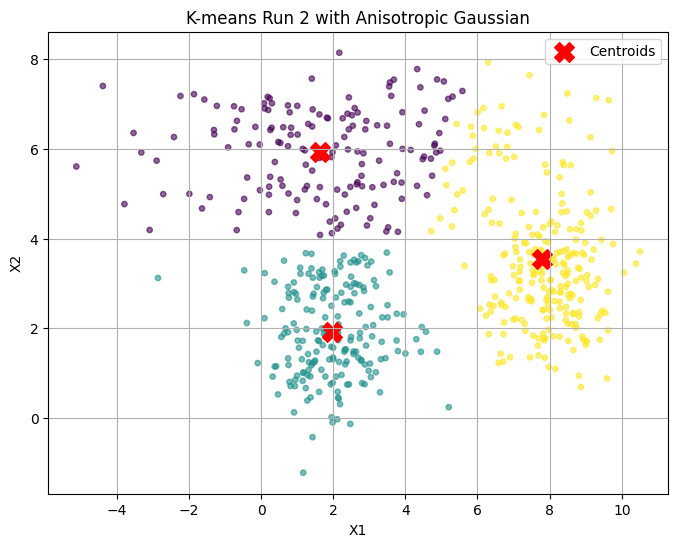

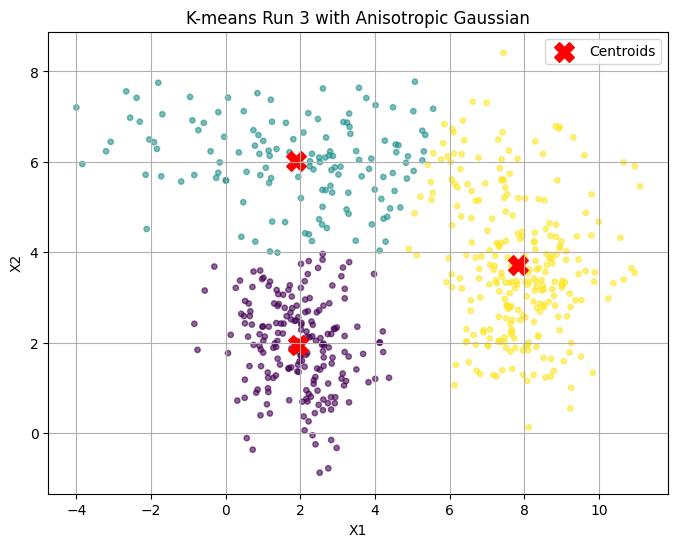

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm sinh dữ liệu Gaussian với Sigma khác nhau
def generate_anisotropic_data():
    Sigma1 = np.array([[1, 0], [0, 1]])     # Phân phối tròn
    Sigma2 = np.array([[10, 0], [0, 1]])    # Phân phối kéo dài theo trục y

    mean1 = [2, 2]
    mean2 = [8, 3]
    mean3 = [3, 6]

    data1 = np.random.multivariate_normal(mean1, Sigma1, 200)
    data2 = np.random.multivariate_normal(mean2, Sigma1, 200)
    data3 = np.random.multivariate_normal(mean3, Sigma2, 200)

    return np.vstack((data1, data2, data3))

# K-means với EM
def kmeans(X, k=3, max_iters=100, tol=1e-4):
    n_samples, n_features = X.shape
    indices = np.random.choice(n_samples, k, replace=False)
    centroids = X[indices]

    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        shift = np.linalg.norm(new_centroids - centroids)
        if shift < tol:
            break
        centroids = new_centroids

    return centroids, labels

# Chạy 3 lần với dữ liệu ngẫu nhiên
for i in range(3):
    X = generate_anisotropic_data()
    centroids, labels = kmeans(X, k=3)

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=15, alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(f"K-means Run {i+1} with Anisotropic Gaussian")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.grid(True)
    plt.show()


=>Nhận xét: Qua việc chạy 3 lần với ba bộ dữ liệu được tạo ngẫu nhiên, ta thấy được ma trận hiệp phương sai có ảnh hưởng đến kết quả phân cụm. Khi ma trận hiệp phương sai mà dữ liệu có phân bố không theo hình tròn, khi đó một số điểm dữ liệu có thể bị kéo lệch hẳn đi khỏi centroid theo chiều ngang ( như hình 3 cụm màu xanh), khi đó các điểm nằm ở rìa cụm nằm rất gần các centroid khác, dễ bị các kéo vào cụm của centroid đó thay vì centroid ban đầu. Điều này cho thấy được, phân bố của dữ liệu không theo hình tròn sẽ dễ làm sai lệch kết quả phân cụm của k-mean, cho thấy đây cũng là điểm yếu của thuật toán k-mean.